## Brief - An analysis of paleo-present climate data
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
- Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-
coverage
- Use a Jupyter notebook for your analysis and track your progress using GitHub.
Use an academic referencing style

In [25]:
import pandas as pd

# 
pd.set_option('display.max_rows', None)
csv_file_path = "Co2.csv"

df = pd.read_csv(csv_file_path)

# No NaN values
df = df.dropna(axis=1, how='all')

# Display the entire DataFrame
print(df)


      Gasage (yr BP)  CO2 (ppmv)  sigma mean CO2 (ppmv)
0             -51.03      368.02                   0.06
1             -48.00      361.78                   0.37
2             -46.28      359.65                   0.10
3             -44.41      357.11                   0.16
4             -43.08      353.95                   0.04
5             -42.31      353.72                   0.22
6             -41.13      352.42                   0.10
7             -39.97      350.81                   0.16
8             -39.41      349.80                   0.14
9             -38.97      349.28                   0.13
10            -38.07      347.60                   0.40
11            -37.21      345.44                   0.03
12            -36.62      344.72                   0.09
13            -36.14      343.97                   0.06
14            -35.76      343.11                   0.14
15            -34.92      342.05                   0.46
16            -33.08      341.33                

In [26]:
import pandas as pd

# files
temperature_csv_path = "temp.csv"

temperature_df = pd.read_csv(temperature_csv_path)

# No NaN values for cleanliness
temperature_df = temperature_df.dropna(axis=1, how='all')

# all row
pd.set_option('display.max_rows', None)

print(temperature_df)

      Depth ice/snow [m]  Age model [ka]  %[SNOW]  delta T [°C]  Sample ID
0                   0.00          -0.050      NaN           NaN          1
1                   0.55          -0.044      NaN           NaN          2
2                   1.10          -0.037      NaN           NaN          3
3                   1.65          -0.032      NaN           NaN          4
4                   2.20          -0.025      NaN           NaN          5
5                   2.75          -0.018      NaN           NaN          6
6                   3.30          -0.011      NaN           NaN          7
7                   3.85          -0.003      NaN           NaN          8
8                   4.40           0.005      NaN           NaN          9
9                   4.95           0.014      NaN           NaN         10
10                  5.50           0.022      NaN           NaN         11
11                  6.05           0.031      NaN           NaN         12
12                  6.60 

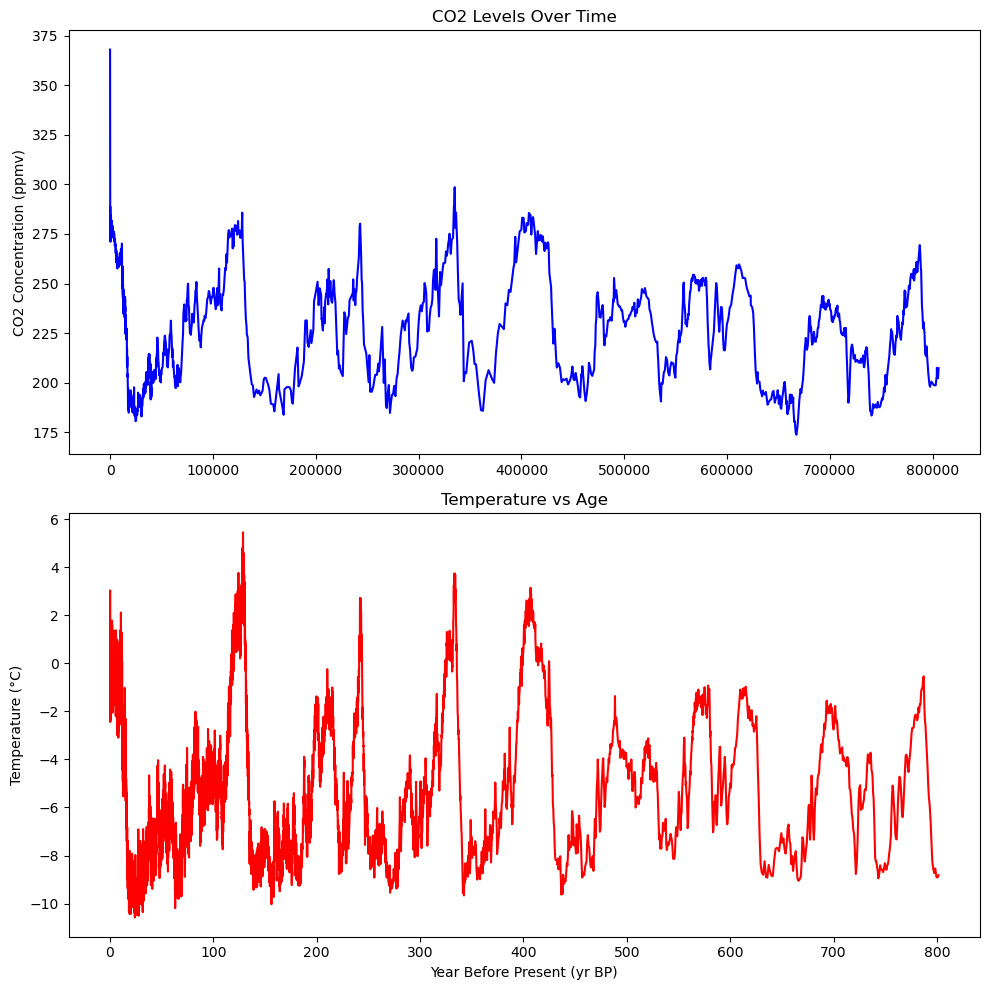

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
file_path_co2 = 'co2.CSV'  # Replace with the actual file path
file_path_temp = 'temp.csv'  # Replace with the actual file path
df_co2 = pd.read_csv(file_path_co2)
df_temp = pd.read_csv(file_path_temp)

# co2 
year_column_co2 = 'Gasage (yr BP)'
co2_column_co2 = 'CO2 (ppmv)'

# temp
age_column_temp = 'Age model [ka]'
temperature_column_temp = 'delta T [°C]'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot CO2
ax1.plot(df_co2[year_column_co2], df_co2[co2_column_co2], linestyle='-', color='b')
ax1.set_ylabel('CO2 Concentration (ppmv)')
ax1.set_title('CO2 Levels Over Time')

# Plot Temp
ax2.plot(df_temp[age_column_temp], df_temp[temperature_column_temp], linestyle='-', color='r')
ax2.set_xlabel('Year Before Present (yr BP)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_title('Temperature vs Age')


plt.tight_layout()

# Show the plot
plt.show()

In [60]:
import pandas as pd
from scipy.stats import pearsonr


file_path_temp = 'temp.csv'
file_path_co2 = 'co2.csv'
df_temp = pd.read_csv(file_path_temp)
df_co2 = pd.read_csv(file_path_co2)


temperature_column_temp = 'delta T [°C]'
co2_column_co2 = 'CO2 (ppmv)'

# Merged
df_merged = pd.merge(df_temp, df_co2, left_on='Age model [ka]', right_on='Gasage (yr BP)', how='inner')

# Drop missin rows
df_temp_co2 = df_merged[[temperature_column_temp, co2_column_co2]].dropna()

# Calculate CC
corr_coefficient, _ = pearsonr(df_temp_co2[temperature_column_temp], df_temp_co2[co2_column_co2])


print(f'Correlation Coefficient: {corr_coefficient}')

Correlation Coefficient: 0.84540633240228


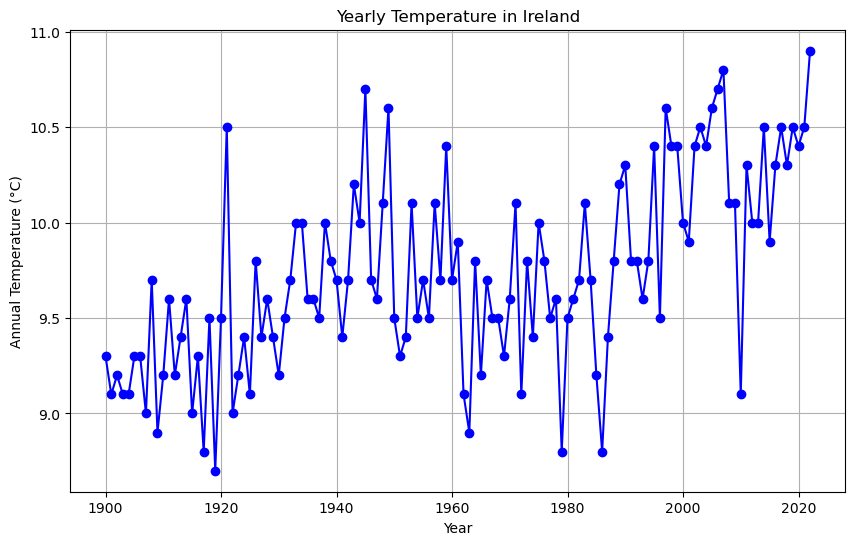

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 
file_path = 'irishtemps.csv'  # Assuming it's in your current directory
df = pd.read_csv(file_path)

year_column = 'year'
temperature_column = 'Annual'


plt.figure(figsize=(10, 6))
plt.plot(df[year_column], df[temperature_column], marker='o', linestyle='-', color='b')


plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland')

# Show the plot
plt.grid(True)
plt.show()

In [64]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'temp.csv'
df = pd.read_csv(file_path)

# Find the row with the highest delta T [°C]
max_temp_row = df[df['delta T [°C]'] == df['delta T [°C]'].max()]

# Find the row with the lowest delta T [°C]
min_temp_row = df[df['delta T [°C]'] == df['delta T [°C]'].min()]

# Extract information from the rows
max_temp_age = max_temp_row['Age model [ka]'].values[0]
min_temp_age = min_temp_row['Age model [ka]'].values[0]
max_temp_value = max_temp_row['delta T [°C]'].values[0]
min_temp_value = min_temp_row['delta T [°C]'].values[0]

# Print the results
print(f'Highest Temperature: {max_temp_value}°C at Age {max_temp_age} ka')
print(f'Lowest Temperature: {min_temp_value}°C at Age {min_temp_age} ka')

Highest Temperature: 5.46°C at Age 128.662 ka
Lowest Temperature: -10.58°C at Age 24.015 ka
